# <p style="padding:15px;background:yellow;text-align:center;text-decoration:underline">Assigment 2<p>

## - Import Libraries

Import necessary libraries used in these assignment.

In [1]:
import numpy as np
import pandas as pd
import math
import operator
import matplotlib.pyplot as plt
import matplotlib as mpl

## - Read File (without header) given a delimeter

Reads a file with a given delimeter and returns the converted numpy array.
<br>
Default when no delimeter is given it reads file as in csv format.

In [2]:
def readFile(trainFile,seperator=",",sample=False):
    try:
        data=pd.read_csv(trainFile, sep=seperator, header=None)
        if sample:
            data=data.sample(frac=1)
        return data.values
    except:
        print("Error reading training data file")

## - Distance Measure

Distance measures we have used is general **Minkowski distance** to calculate the distance between 2 set of records.
<br>
User can provide various values of p to use the desired form of minkowski as follows:

* **Manhattan:** Provide p=1.

* **Euclidean:(default)** Provide p=2.

* **ChebyShev:** Provide p=3.

In [3]:
def distMeasure(dataset,testdataset,targetIndex,p):
    n=len(testdataset)
    dist=0
    for i in range(n):
        if i==targetIndex:continue
        dist+=math.pow(abs(dataset[i]-testdataset[i]),p);
    return math.pow(dist,1/p)

In [4]:
def chebyshev(dataset,testdataset,targetIndex,p):
    n=len(testdataset)
    dist=0
    for i in range(n):
        if i==targetIndex:continue
        dist=max(abs(dataset[i]-testdataset[i]),dist);
    return dist

## -Train Test split

Given a percentage, it will split out the data into train dataset and test dataset.

In [5]:
def splitTrainTest(data,percent):
    total=len(data)
    trainTotal=int(total*percent*0.01)
    testTotal=total-trainTotal
    return (data[0:trainTotal],data[trainTotal:total])

## -K nearest neighbour Algorithm

In our algorithm we determine the k train data records which are nearest to the given test record.<br>
We can use various distance measures by varying the value of p as we discussed above. (Default is 2 for Euclidean).
<br>
We have stored the distances of all the train data records from test record in a dictionary whose key is a tuple:
 
$$ [ (trainRecord1,0/1):distance1 ] $$

$$ [ (trainRecord2,0/1):distance2 ] $$

..and so on

Then we will sort this dictionary in non-decreasing order of distances (values).
And finally we pick the top **' k '** key, value pair of the dictionary and return the class/label appeared most number of times.  

In [6]:
def KNNAlgo(train,testRecord,k,targetIndex,p):
    dists={}
    count=0
    if p==3:
        funct=chebyshev
    else:
        funct=distMeasure
    for trainRecord in train:
        dist=funct(trainRecord,testRecord,targetIndex,p)
        dists[(str(trainRecord),trainRecord[targetIndex],count)]=dist
        count+=1
    sortedDict= sorted(dists.items(), key=operator.itemgetter(1))
    labelDict={}
    for i in range(k):
        if sortedDict[i][0][1] in labelDict.keys():
            labelDict[sortedDict[i][0][1]]+=1
        else:
            labelDict[sortedDict[i][0][1]]=1
    return max(labelDict.items(),key=operator.itemgetter(1))[0]

### -Prediction

This method will predict the label of each of the test record in test Dataset there by calling above KNN algorithm and returns a tuple of ``` accuracy, precision, recall and f1 Score ```.

In [7]:
def predict(train,test,k,targetIndex,p,dataType="robot"):
    count=0
    TP=0
    TN=0
    FP=0
    FN=0
    totalP=0
    totalN=0
    precision=None
    recall=None
    f1Val=None
    if dataType=="robot":
        for testRecord in test:
            predicted=KNNAlgo(train,testRecord,k,targetIndex,p)
            actual=testRecord[targetIndex]
            if actual==0:
                totalP+=1
            elif actual==1:
                totalN+=1
            if actual==predicted:
                count+=1
                if predicted==0:
                    TP+=1
                else:
                    TN+=1
        FP=totalN-TN
        FN=totalP-TP
        if TP+FP!=0:
            precision=TP/(TP+FP)
        if TP+FN!=0:
            recall=TP/(TP+FN)
        if recall and precision:
            f1Val=2*recall*precision/(recall+precision)
        accuracy=count/len(test)
        return (accuracy,precision,recall,f1Val)
    #iris
    else:
        ta=0
        tb=0
        tc=0
        fa=0
        fb=0
        fc=0
        precisionA=None
        precisionA=None
        precisionA=None
        recallA=None
        recallB=None
        recallC=None
        f1ValA=None
        f1ValB=None
        f1ValC=None
        for testRecord in test:
            predicted=KNNAlgo(train,testRecord,k,targetIndex,p).upper()
            actual=testRecord[targetIndex].upper()
            # a=Iris-setosa
            # b=Iris-virginica
            # c=Iris-versicolor
            if actual==predicted:
                count+=1
                if actual=="IRIS-SETOSA":
                    ta+=1
                elif actual=="IRIS-VIRGINICA":
                    tb+=1
                elif actual=="IRIS-VERSICOLOR":
                    tc+=1
            else:
                if predicted=="IRIS-SETOSA":
                    fa+=1
                elif predicted=="IRIS-VIRGINICA":
                    fb+=1
                elif predicted=="IRIS-VERSICOLOR":
                    fc+=1
        
        if ta+fa!=0:
            precisionA=ta/(ta+fa)
        if tb+fb!=0:
            precisionB=tb/(tb+fb)
        if tc+fc!=0:
            precisionC=tc/(tc+fc)

        if ta+fb+fc!=0:
            recallA=ta/(ta+fb+fc)
        if tb+fa+fc!=0:
            recallB=tb/(tb+fa+fc)
        if tc+fa+fb!=0:
            recallC=tc/(tc+fa+fb)

        if recallA and precisionA:
            f1ValA=2*recallA*precisionA/(recallA+precisionA)
        if recallB and precisionB:
            f1ValB=2*recallB*precisionB/(recallB+precisionB)
        if recallC and precisionC:
            f1ValC=2*recallC*precisionC/(recallC+precisionC)
#         print(ta,fb,fc)        
#         print(fa,tb,fc)        
#         print(fa,fb,tc)        
        head=("TYPE","Precision","Recall","F1-score")
        aM=("IRIS-SETOSA",precisionA,recallA,f1ValA)
        bM=("IRIS-VIRGINICA",precisionB,recallB,f1ValB)
        cM=("IRIS-VERSICOLOR",precisionC,recallC,f1ValC)
        
        return ((count/len(test)),head,aM,bM,cM)

### - Train And Predict

Interface for both the kind of datasets i.e **Robot and iris.**<br>
It will clean up the datasets by removing unnecessary columns. <br>
And finally call the above methods with appropriate parameters (According to the user call).

In [8]:
def trainAndPredict(trainFile,percent,k,targetIndex,dataType,p=2,testFile=None):
    testData=[]
    if dataType=="robot":
        data=readFile(trainFile," ")
        data=np.delete(data, 0, 1)
        data=np.delete(data, 7, 1)
        targetIndex=0
        if testFile:
            testData=readFile(testFile," ")
            testData=np.delete(testData, 0, 1)
            testData=np.delete(testData, 7, 1)
            
    elif dataType=="iris":
        data=readFile(trainFile)
        if testFile:
            testData=readFile(testFile)
    else:
        print("Invalid data type : expected iris or robot")
        return
    
    train,validate=splitTrainTest(data,percent)
    if len(testData)>0:
        validate=testData
    if len(validate)==0:
        print("No validate/test data to evaluate")
        return None
    return predict(train,validate,k,targetIndex,p,dataType)

***

## Part-1 Working with Robot-1, Robot-2 and Iris Datasets.

Please run the below cell by passing following parameters.

1. Train File: Path of train File
2. Percentage: use for training **(remaining percentage will be used for the validation if test file is not provided).**
3. Value of K
4. Target Index (must not change)
5. Identifier: "robot" or "iris" to distinguish robots and iris dataset.
6. P: distance measure 1,2 (default),3... and so on.
7. Test File (optional): Path of test File.

### 1.1 Robot-1

In [9]:
#uncomment below to run it on a test file passed as last parameter
# matrix=trainAndPredict("RobotDataset/Robot1",80,7,1,"robot",2,"RobotDataset/testRobot1")

# below model is trained on 80% train data and show the matrix for remaining 20% validation data
matrix=trainAndPredict("RobotDataset/Robot1",80,7,1,"robot",2)
if matrix:
    print("=================================")
    print("Accuracy= ",matrix[0])
    print("Precision= ",matrix[1])
    print("Recall= ",matrix[2])
    print("F1-Score= ",matrix[3])

Accuracy=  0.84
Precision=  0.5
Recall=  1.0
F1-Score=  0.6666666666666666


### 1.1 Robot-2

In [10]:
#uncomment below to run it on a test file passed as last parameter
# matrix=trainAndPredict("RobotDataset/Robot2",80,7,1,"robot",2,"RobotDataset/testRobot2")

# below model is trained on 80% train data and show the matrix for remaining 20% validation data
matrix=trainAndPredict("RobotDataset/Robot2",80,7,1,"robot",2)
print("=================================")
print("Accuracy= ",matrix[0])
print("Precision= ",matrix[1])
print("Recall= ",matrix[2])
print("F1-Score= ",matrix[3])

Accuracy=  0.92
Precision=  0.875
Recall=  1.0
F1-Score=  0.9333333333333333


### 1.1 Iris

In [11]:
#uncomment below to run it on a test file passed as last parameter
# matrix=trainAndPredict("Iris/Iris.csv",80,7,4,"iris",2,"Iris/testIris.csv")

# below model is trained on 80% train data and show the matrix for remaining 20% validation data
matrix=trainAndPredict("Iris/Iris.csv",80,7,4,"iris",2)
print("=================================")
print("Accuracy= ",matrix[0])
print("=================================")
print("%15s | %15s | %15s | %15s |"%matrix[1])
print("%15s | %15f | %15f | %15f |"%matrix[2])
print("%15s | %15f | %15f | %15f |"%matrix[3])
print("%15s | %15f | %15f | %15f |"%matrix[4])

Accuracy=  0.9629629629629629
           TYPE |       Precision |          Recall |        F1-score |
    IRIS-SETOSA |        1.000000 |        0.916667 |        0.956522 |
 IRIS-VIRGINICA |        0.857143 |        1.000000 |        0.923077 |
IRIS-VERSICOLOR |        1.000000 |        0.900000 |        0.947368 |


### 1.2 "Accuracy" vs "K" graph KNN Algorithm

In [12]:
mpl.rcParams.update(mpl.rcParamsDefault)
def drawGraph(trainFile,percent,targetIndex,dataType,title=None,testFile=None):
    accuracyList1=[]
    accuracyList2=[]
    accuracyList3=[]
    if dataType=="robot":
        for i in range(1,18,2):
            matrix1=trainAndPredict(trainFile,percent,i,targetIndex,"robot",2,testFile)
            matrix2=trainAndPredict(trainFile,percent,i,targetIndex,"robot",1,testFile)
            matrix3=trainAndPredict(trainFile,percent,i,targetIndex,"robot",3,testFile)
            accuracyList1.append(matrix1[0])
            accuracyList2.append(matrix2[0])
            accuracyList3.append(matrix3[0])
    elif dataType=="iris":
        for i in range(1,18,2):
            matrix1=trainAndPredict(trainFile,percent,i,targetIndex,"iris",2,testFile)
            matrix2=trainAndPredict(trainFile,percent,i,targetIndex,"iris",1,testFile)
            matrix3=trainAndPredict(trainFile,percent,i,targetIndex,"iris",3,testFile)
            accuracyList1.append(matrix1[0])
            accuracyList2.append(matrix2[0])
            accuracyList3.append(matrix3[0])
    else:
        print("Invalid data type : expected iris or robot")
        return
    plt.title(title)
    plt.xlabel("number of neighbours (K)")
    plt.ylabel("Accuracy (in percent)")
    plt.plot(range(1,18,2), accuracyList1,color="orange", linewidth=2.5, label="Euclidean")
    plt.plot(range(1,18,2), accuracyList2,color="green", linewidth=2.5, label="Manhattan")
    plt.plot(range(1,18,2), accuracyList3,color="blue", linewidth=2.5, label="ChebyShev")
    plt.legend()
    plt.grid(True)
    plt.show()
    

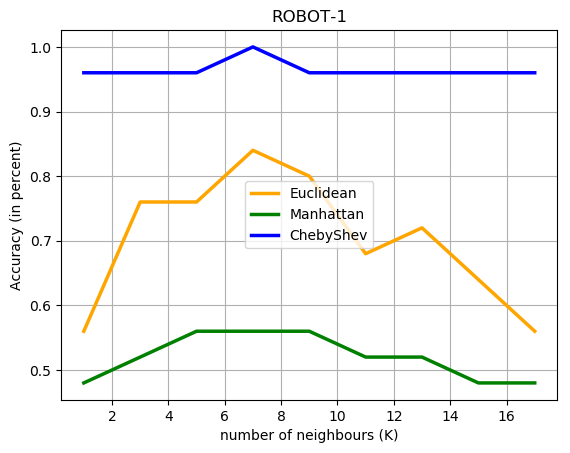

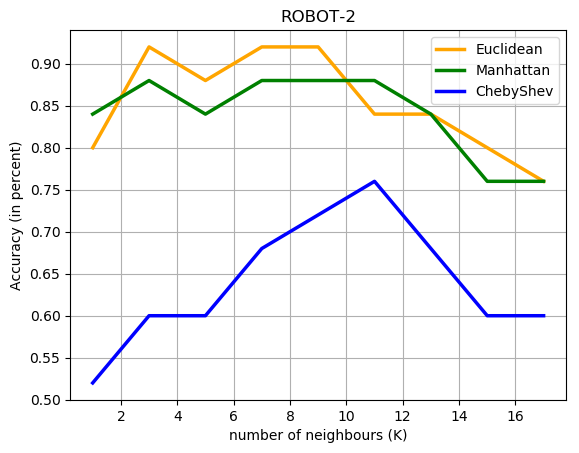

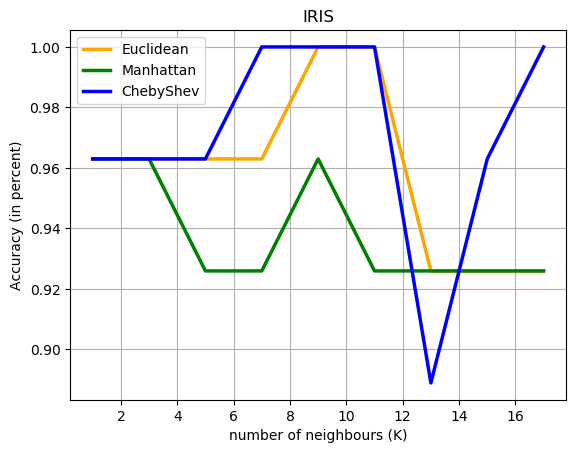

In [13]:
drawGraph("RobotDataset/Robot1",80,1,"robot","ROBOT-1")
drawGraph("RobotDataset/Robot2",80,1,"robot","ROBOT-2")
drawGraph("Iris/Iris.csv",80,4,"iris","IRIS")

#with test File as last parameter

# drawGraph("RobotDataset/Robot1",80,1,"robot","ROBOT-1","RobotDataset/testRobot1")
# drawGraph("RobotDataset/Robot2",80,1,"robot","ROBOT-2","RobotDataset/testRobot2")
# drawGraph("Iris/Iris.csv",80,4,"iris","IRIS","Iris/testIris.csv")

### - Comparision with scikit learn

In [14]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix  

def skLearn(trainFile,trainDataPercent,delimeter,unwantedCols,NANCols,k,targetIndex,avg=None,testFile=None):
    if trainDataPercent==100:
        print("No Validation data (Training percent should be less than 100)")
        return
    data=readFile(trainFile,delimeter)
#     data=data.sample(frac=1)
        
    le = LabelEncoder()
    X=None
    
    for i in NANCols:
        data[:,i]=le.fit_transform(data[:,i])
    
    Y=data[:,targetIndex]
    Y=Y.astype('int')
    X=np.delete(data,unwantedCols,axis=1)
    trainX,testX,trainY,testY=train_test_split(X,Y,test_size=(100-trainDataPercent)/100,shuffle=False)
    
    if testFile:
        testData=readFile(testFile,delimeter)
        for i in NANCols:
            testData[:,i]=le.fit_transform(testData[:,i])
        testY=testData[:,targetIndex]
        testY=testY.astype('int')
        testX=np.delete(testData,unwantedCols,axis=1)
        
    
    #specify p=1,2,3
    tree = KNeighborsClassifier(n_neighbors=k,p=2)      
    tree.fit(trainX, trainY)  
    y_pred = tree.predict(testX)  
    matrix=precision_recall_fscore_support(testY,y_pred,average=avg)
    confMat=confusion_matrix(testY,y_pred)
    print(confMat)
    print("=======================================================")
#     print(confMat)
    print("Accuracy= ",accuracy_score(testY,y_pred))
    print(classification_report(testY, y_pred))

In [15]:
print("=======================================================")
print("Accuracy and measurement matrix for Robot1")
skLearn("RobotDataset/Robot1",80," ",[0,1,8],[],7,1,"binary")
print("=======================================================")
print("Accuracy and measurement matrix for Robot2")
skLearn("RobotDataset/Robot2",80," ",[0,1,8],[],7,1,"binary")
print("=======================================================")
print("Accuracy and measurement matrix for Iris")
skLearn("Iris/Iris.csv",80,",",[4],[4],7,4,None)

#with test file passed as last parameter

# print("=======================================================")
# print("Accuracy and measurement matrix for Robot1")
# skLearn("RobotDataset/Robot1",80," ",[0,1,8],[],7,1,"binary","RobotDataset/testRobot1")
# print("=======================================================")
# print("Accuracy and measurement matrix for Robot2")
# skLearn("RobotDataset/Robot2",80," ",[0,1,8],[],7,1,"binary","RobotDataset/testRobot2")
# print("=======================================================")
# print("Accuracy and measurement matrix for Iris")
# skLearn("Iris/Iris.csv",80,",",[4],[4],7,4,None,"Iris/testIris.csv")


Accuracy and measurement matrix for Robot1
[[ 4  0]
 [ 5 16]]
Accuracy=  0.8
              precision    recall  f1-score   support

           0       0.44      1.00      0.62         4
           1       1.00      0.76      0.86        21

   micro avg       0.80      0.80      0.80        25
   macro avg       0.72      0.88      0.74        25
weighted avg       0.91      0.80      0.82        25

Accuracy and measurement matrix for Robot2
[[14  0]
 [ 2  9]]
Accuracy=  0.92
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.82      0.90        11

   micro avg       0.92      0.92      0.92        25
   macro avg       0.94      0.91      0.92        25
weighted avg       0.93      0.92      0.92        25

Accuracy and measurement matrix for Iris
[[11  0  0]
 [ 0  9  1]
 [ 0  0  6]]
Accuracy=  0.9629629629629629
              precision    recall  f1-score   support

           0       1.00     

## Part 2- Naive Bayes classifier on bank dataset

According to the Bayes theorem:

$$ P(Y \mid X_1,X_2,...X_n)= \frac{P(X_1,X_2,...X_n \mid Y)\, P(Y)}{P(X_1,X_2,...X_n)}$$

Under naive bayes assumption :

$$ P(X_1,X_2,...X_n \mid Y)= \prod_{i=1}^nP(X_i \mid Y)$$

We will calculate the above posterior under the hypothesis $Y = 1$ and $Y = 0$ and whichever is greater will become class for that evidance.

**Training**
* **Categorical Features**
<br>
<hr>
    -We will first seperate out the training records which have target Class values 0 and 1 , 
    say zeroRecords and oneRecords.<br>
    -Amongst all the zeroRecords we will find out unqiue value count for all catergorical features and put them into a dictionary with key 0.<br>
    -Amongst all the oneRecords we will find out unqiue value count for all catergorical features and put them into a dictionary with key 1.<br>
    -Now put this dictionary into $featureIndexDictionary$ with key as index of catergorical feature.<br>
    -Now these dictionary can be easily used to calculate the likelyhood under hypothesis $Y = 1$ and $Y = 0$ for categorical features.

$$\{6:\{0: \{1:count01,2:count02,3:count03\},$$
$$    1: \{1:count11,2:count12,3:count13\}$$
$$   \}$$
$$ \}$$

<hr>

* **Numerical Features**
<br>
<hr>
    -We will first seperate out the training records which have target Class values 0 and 1 , 
    say zeroRecords and oneRecords.<br>
    -Amongst all the zeroRecords we will find out the mean and standard deviation for all the numerical features and put them into a dictionary with key 0.<br>
    -Amongst all the oneRecords we will find out the mean and standard deviation for all the numerical features and put them into a dictionary with key 1.<br>
    -Now put this dictionary into $meanStdDeviationIndex$ dictionary with key as index of numerical feature.<br>
    -Now these dictionary can be easily used to calculate the likelyhood using gaussian normal distribution under hypothesis $Y = 1$ and $Y = 0$ for numerical features.

$$\{3:\{0: \{mean: ,std: \},$$
$$    1: \{mean: ,std: \}$$
$$   \}$$
$$ \}$$

<hr>




We will remove the id column from the data internally.
<br>
Now the user can specify the below indexes used for the attributes to specify which attributes are categorical and which are numerical.

**Indexing**
* [0] Age**(default-numerical)**

* [1] Number of years of experience  **(default-numerical)**

* [2] Annual Income   **(default-numerical)**

* [3] ZIPCode

* [4] Family size  **(default-numerical)**

* [5] Avgerage spending per month  **(default-numerical)**

* [6] Education Level. 1: 12th; 2: Graduate; 3: Post Graduate  **(default-categorical)**

* [7] Mortgage Value of house if any  **(default-numerical)**

* [8] Did this customer accept the personal loan offered in the last campaign?  **Output label **

* [9] Does the customer have a securities account with the bank? **(default-categorical)**

* [10] Does the customer have a certificate of deposit (CD) account with the bank? **(default-categorical)**

* [11] Does the customer use internet banking facilities? **(default-categorical)**

* [12] Does the customer uses a credit card issued by UniversalBank? **(default-categorical)**


### -Normal Distribution

In [16]:
def getProbabilityNormal(x, mean, std):
    exp = math.exp(-(math.pow(x-mean,2)/(2*math.pow(std,2))))
    return (1 / (math.sqrt(2*math.pi) * std)) * exp

### -Algorithm

In [17]:
import pprint
def bayesClassifier(trainFile,percent,categoricalList=[6,9,10,11,12],numericalList=[0,1,2,4,5,7],testFile=None):
    testData=[]
    #data=pd.read_csv(trainFile,",",header=0).sample(frac=1).values
    data=pd.read_csv(trainFile,",",header=0).values
    data=np.delete(data,0,axis=1)

    train,test=splitTrainTest(data,percent)
    
    ##Test file#############
    if testFile:
        #ignoring first row assuming wrong data, change to none if accurate
        testData=pd.read_csv(testFile,",",header=0).values
        testData=np.delete(testData,0,axis=1)
    if len(testData)>0:
        test=testData
    ##Test file#############

    zeroRecords=np.where(train[:,8]==0)
    oneRecords=np.where(train[:,8]==1)

    totalZeroRecords=len(zeroRecords[0])
    totalOneRecords=len(oneRecords[0])
    # print(totalOneRecords,totalZeroRecords)
    
    ############################################################################
    #Calculate all the possible probabilities of all the attributes for each hypothesis
    
    
    ############################## Categorical Attr start ##############################
    featureIndexDict={}

    # {3:{0: {1:count,2:,3:}
    #     1: {1:,2:,3:}
    #     }
    #}
    
    for i in categoricalList:
        CCardUser={}
        CCardUserONE=np.unique(train[oneRecords[0],i],return_counts=True)
        # print("CCardUserONE",CCardUserONE)
        CCardUser[1]={value:CCardUserONE[1][index] for index,value in enumerate(CCardUserONE[0])}

        CCardCUserZERO=np.unique(train[zeroRecords[0],i],return_counts=True)
        # print("CCardCUserZERO",CCardCUserZERO)
        CCardUser[0]={value:CCardCUserZERO[1][index] for index,value in enumerate(CCardCUserZERO[0])}
        featureIndexDict[i]=CCardUser
    # pprint.pprint(featureIndexDict)
    
    ############################## Categorical Attr end ##############################
    
    ############################## Numerical Attr start ##############################
    
    meanStdDictIndex={}
    
    # {0:{0: {"mean":,"std":}
    #     1: {"mean":,"std":}
    #     }
    # }
    
    for i in numericalList:
        myDict={}
        ageMeanONE=np.mean(train[oneRecords[0],i])
        # print("ageMeanONE ",ageMeanONE)
        ageMeanZERO=np.mean(train[zeroRecords[0],i])
        # print("ageMeanZERO ",ageMeanZERO)
        ageStdONE=np.std(train[oneRecords[0],i])
        # print("ageStdONE ",ageStdONE)
        ageStdZERO=np.std(train[zeroRecords[0],i])
        myDict[1]={"mean":ageMeanONE,"std":ageStdONE}
        myDict[0]={"mean":ageMeanZERO,"std":ageStdZERO}
        meanStdDictIndex[i]=myDict
#     pprint.pprint(meanStdDictIndex)
    ############################## Numerical Attr end ##############################
    ############################################################################
    
    priorOne=totalOneRecords/(totalZeroRecords+totalOneRecords)
    priorZero=totalZeroRecords/(totalZeroRecords+totalOneRecords)
    priors={0:priorZero,1:priorOne}
    totalOneZeroRecords={0:totalZeroRecords,1:totalOneRecords}

    ############################ Prediction ###################################
    count=0
    answers={}
    TP=0
    TN=0
    FP=0
    FN=0
    totalP=0
    totalN=0
    for testR in test:
        for i in [0,1]:
            numerical=1
            categorical=1
            for index in numericalList:
                numerical*=getProbabilityNormal(testR[index],meanStdDictIndex[index][i]["mean"],meanStdDictIndex[index][i]["std"])
            for index in categoricalList:
                try:
                    categorical*=featureIndexDict[index][i][testR[index]]/totalOneZeroRecords[i]
                except:
                    categorical=0
            ans=categorical*numerical*priors[i]
            answers[i]=ans
#         print(answers)
        actual=testR[8]
        if actual==0:
            totalN+=1
        if actual==1:
            totalP+=1
        if answers[1]>answers[0] and testR[8]==1:
            count+=1
            TP+=1
        elif answers[1]<=answers[0] and testR[8]==0:
            count+=1
            TN+=1
    FP=totalN-TN
    FN=totalP-TP
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    f1Val=2*recall*precision/(recall+precision)
    accuracy=count/len(test)
    return (accuracy,precision,recall,f1Val)
    
    ############################ Prediction end ###################################



In [18]:
#make sure first row is proper in testData.csv

#with test data file as last parameter
# matrix=bayesClassifier("LoanDataset/data.csv",80,[6,9,10,11,12],[0,1,2,4,5,7],"LoanDataset/testData.csv")

#evaluation on 20% validation data
matrix=bayesClassifier("LoanDataset/data.csv",80,[6,9,10,11,12],[0,1,2,4,5,7])

print("=================================")
print("Accuracy= ",matrix[0])
print("Precision= ",matrix[1])
print("Recall= ",matrix[2])
print("F1-Score= ",matrix[3])

Accuracy=  0.9155555555555556
Precision=  0.52
Recall=  0.65
F1-Score=  0.5777777777777778


## Part-3 Linear regression to predict the probablity of getting the admit.

Following **Error Measures** have been used under part-2 of this question

**Mean Absolute Error:**
$$ MAE = \frac{1}{n}\sum_{\forall y}|y_{actual}-y_{predicted} | $$
<hr>

**Mean Square Error:**
$$ MAE = \frac{1}{n}\sum_{\forall y}(y_{actual}-y_{predicted} ){^2} $$

<hr>

**Mean Percentage Error:**
$$ MAE = \frac{100\%}{n}\sum_{\forall y}\frac{(y_{actual}-y_{predicted} )}{y_{actual}} $$


In [19]:
# function return Mean absolute Value
def MAE(testRecords,testYs,predictions):
    error=0
    for actual,predicted in zip(testYs,predictions):
        predicted=predicted[0]
        error+=abs(actual-predicted)
    print("Mean Absolute Error = ",error/len(testYs))

In [20]:
# function return Mean square error
def MSE(testRecords,testYs,predictions):
    error=0
    for actual,predicted in zip(testYs,predictions):
        predicted=predicted[0]
        error+=(actual-predicted)**2
    print("Mean Square Error = ",error/len(testYs))

In [21]:
# function return Mean percentage error
def MPE(testRecords,testYs,predictions):
    error=0
    for actual,predicted in zip(testYs,predictions):
        predicted=predicted[0]
        error+=(actual-predicted)/actual
    print("Mean Percentage Error = ",100*error/len(testYs))

### 3.1. Predicting probabiliy of getting admit

As we know to calculate the value of dependent variable $Y$ we can use the below general equation:

$$Y=\beta_{0}+\beta_{1}X_1+\beta_{2}X_2+....+\beta_{n}X_n+\epsilon$$

Then using matrix calculus we find that the least square estimate for $\beta$ is given by:

$$B=((X{^T}X){^-1}X{^T}Y)$$

Hence the least square regession line can be given by
$$Y=X\beta$$

In [22]:
import copy
def predictProbAdmit(trainFile,percent,independentVariable=[1,2,3,4,5,6,7],targetIndex=8,forGraph=False,testFile=None):
    data=pd.read_csv(trainFile).values
    independentVariable=[0]+independentVariable
    
    train,test=splitTrainTest(data,percent)
    
    if testFile:
        test=pd.read_csv(testFile).values
    
    otest=copy.deepcopy(test)
    otrain=copy.deepcopy(train)
    
    testY=test[:,targetIndex]
    trainY=train[:,targetIndex]
    
    test[:,0]=1 #changeing first column to constant so it can be used for intercept
    train[:,0]=1
    
    train=train[:,independentVariable]
    test=test[:,independentVariable]
   
    if forGraph:
        test=train
        testY=trainY
        otest=otrain
    
    y=np.transpose(np.matrix(trainY))
    X=np.matrix(train)
    XT=np.transpose(X)
    inverse=np.linalg.inv(XT*X)
    coefficents=inverse*XT*y
    predicted=np.array(np.matrix(test)*coefficents)
    coefficents=np.array(coefficents)
    return (otest,testY,predicted,coefficents)#     

In [23]:
def printActualPredicted(testRecords,testYs,predictions,coefficents):
    print("Intercept value= ",coefficents[0][0])
    print("GRE Score Coefficent ",coefficents[1][0])
    print("TOEFL Score Coefficent ",coefficents[2][0])
    print("University Rating Coefficent ",coefficents[3][0])
    print("SOP Coefficent ",coefficents[4][0])
    print("LOR Coefficent ",coefficents[5][0])
    print("CGPA Coefficent ",coefficents[6][0])
    print("Research Coefficent ",coefficents[7][0])
    print("=======================================================================================")
    MSE(testRecords,testYs,predictions)
    print("=======================================================================================")
    print("%20s | %22s | %10s"%("Admit Chance(Actual)","Admit Chance(Predicted)","Test Records"))
    print("=======================================================================================")
    for testRecord,actual,pre in zip(testRecords,testYs,predictions):
        print("%20f | %22f | %10s"%(actual,pre[0],testRecord))

In [24]:
#with test data file as last parameter
# printActualPredicted(*predictProbAdmit("AdmissionDataset/data.csv",80,[1,2,3,4,5,6,7],8,False,"AdmissionDataset/testData.csv"))

#evaluation on 20% validation data
printActualPredicted(*predictProbAdmit("AdmissionDataset/data.csv",80))

Intercept value=  -1.3397614394551653
GRE Score Coefficent  0.002057980544864853
TOEFL Score Coefficent  0.002612677744456003
University Rating Coefficent  0.008676790804446203
SOP Coefficent  -0.001952885191650225
LOR Coefficent  0.015770404479405593
CGPA Coefficent  0.1215084833212993
Research Coefficent  0.023728480514227657
Mean Square Error =  0.004663968348542755
Admit Chance(Actual) | Admit Chance(Predicted) | Test Records
            0.480000 |               0.582122 | [ 97.   306.   100.     2.     3.     3.     8.     0.     0.48]
            0.470000 |               0.455997 | [345.   295.    96.     2.     1.5    2.     7.34   0.     0.47]
            0.530000 |               0.619233 | [388.   307.   105.     2.     2.     3.5    8.1    0.     0.53]
            0.700000 |               0.553113 | [359.   314.   105.     2.     2.5    2.     7.64   0.     0.7 ]
            0.780000 |               0.744111 | [128.   319.   112.     3.     2.5    2.     8.71   1.     0.78]
 

### 3.2. Performance of Mean square error loss function vs Mean Absolute error function vs Mean absolute percentage error function.

In [25]:
# MSE(*predictProbAdmit("AdmissionDataset/data.csv",80,[1,2,3,4,5,6,7],8,False,"AdmissionDataset/testData.csv")[:3])
# MAE(*predictProbAdmit("AdmissionDataset/data.csv",80,[1,2,3,4,5,6,7],8,False,"AdmissionDataset/testData.csv")[:3])
# MPE(*predictProbAdmit("AdmissionDataset/data.csv",80,[1,2,3,4,5,6,7],8,False,"AdmissionDataset/testData.csv")[:3])

MSE(*predictProbAdmit("AdmissionDataset/data.csv",80)[:3])
MAE(*predictProbAdmit("AdmissionDataset/data.csv",80)[:3])
MPE(*predictProbAdmit("AdmissionDataset/data.csv",80)[:3])

Mean Square Error =  0.004663968348542755
Mean Absolute Error =  0.04976955657387148
Mean Percentage Error =  -2.049160071628781


### 3.3 Behaviour of the coefficents:

A coefficient $'m'$ is known as the slope of a line or a plane or any other geometeric shape. It tells how much an dependent variable changes with a unit value change an independent variable.

Example: Consider an equation of the line $y = mx + c $. 
Here, $y$ is the dependent variable and $x$ is the indpendent variable and $m$ is the slope.

Here $c$ is the intercept made by the geomatric features given all the independent features set to $0$.

A positive coefficient means the slope is ascending.

A negative coefficient means the slope is descending.

Following coefficents and intercept observed:

**Intercept**

$$Intercept value=  -1.3397614394551653$$

**Coefficent**
$$GRE Score Coefficent=  0.002057980544864853$$

$$TOEFL Score Coefficent=  0.002612677744456003$$

$$University Rating Coefficent=  0.008676790804446203$$

$$SOP Coefficent=  -0.001952885191650225$$

$$LOR Coefficent=  0.015770404479405593$$

$$CGPA Coefficent=  0.1215084833212993$$

$$Research Coefficent=  0.023728480514227657$$

In [26]:
def visualize(trainFile,percent,onTraining=True):
    labels={1:"GRE Score",2:"TOEFL Score",3:"University Rating",4:"SOP",5:"LOR",6:"CGPA",7:"Research"}
    
    testRecords,testYs,predictions=predictProbAdmit(trainFile,percent,[1,2,3,4,5,6,7],8,onTraining)[:3]
    plt.scatter(testRecords[:,1],testYs,color="orange",label="Actual")
    plt.scatter(testRecords[:,1],predictions,color="green",label="Predicted")
    if onTraining:
        plt.xlabel("Training dataset")
    else:
        plt.xlabel("Validation dataset")
    plt.ylabel("Chance of Admit")
    plt.legend()
    plt.show()    
    
    for i in range(1,3):
        testRecords,testYs,predictions=predictProbAdmit(trainFile,percent,[i],8,onTraining)[:3]
        plt.scatter(testRecords[:,i],testYs,color="orange")
        plt.plot(testRecords[:,i],predictions,color="green",linewidth="2.4",label="Predicted")

        plt.xlabel(labels[i])
        plt.ylabel("Chance of Admit")
        plt.legend()
        plt.grid(True)

        plt.show()


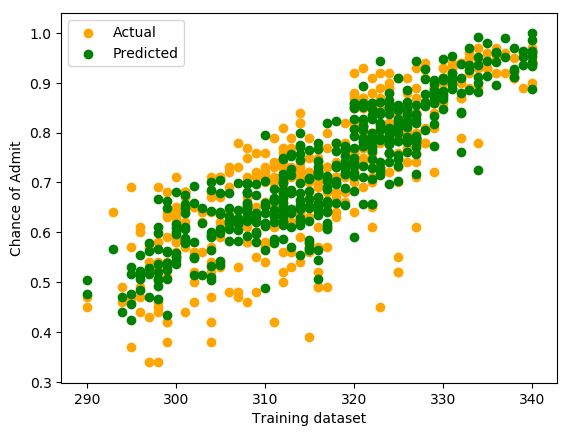

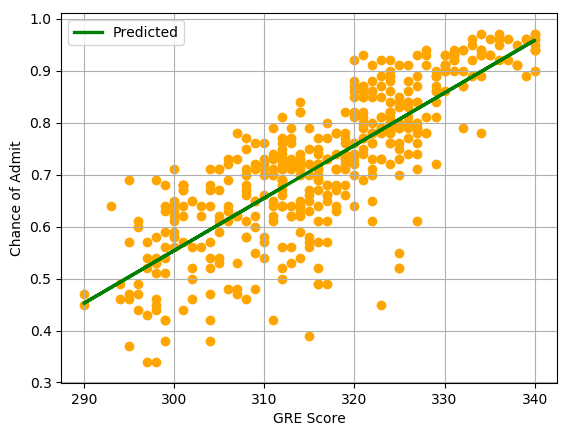

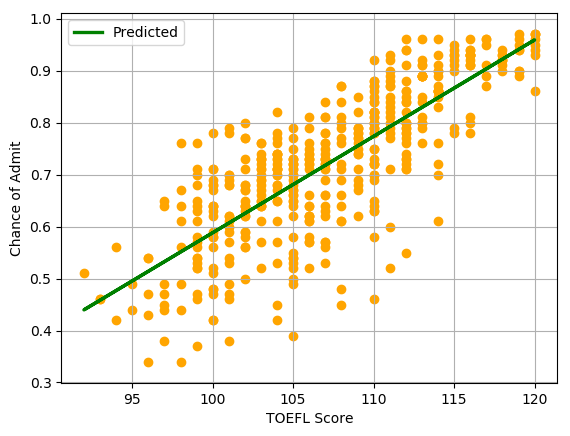

In [27]:
visualize("AdmissionDataset/data.csv",100,True)

### Comparision with scikit learn linear regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def skLearnReg(trainFile,trainDataPercent,unwantedCols,NANCols,targetIndex,testFile=None):
    if trainDataPercent==100:
        print("No Validation data (Training percent should be less than 100)")
        return
    data=pd.read_csv(trainFile).values
#     data=data.sample(frac=1)
    
    le = LabelEncoder()
    X=None
    for i in NANCols:
        data[:,i]=le.fit_transform(data[:,i])
    
    Y=data[:,targetIndex]
    X=np.delete(data,unwantedCols,axis=1)
    trainX,testX,trainY,testY=train_test_split(X,Y,test_size=(100-trainDataPercent)/100,shuffle=False)
    
    if testFile:
        testData=pd.read_csv(testFile).values
        for i in NANCols:
            testData[:,i]=le.fit_transform(testData[:,i])
        testY=testData[:,targetIndex]
        testX=np.delete(testData,unwantedCols,axis=1)
    
    model = LinearRegression()      
    reg=model.fit(trainX, trainY)  
#     print(reg.coef_)
#     print(reg.intercept_)
    predictedY=reg.predict(testX)
    print("========================")
    print("Mean square Error = ",mean_squared_error(testY,predictedY))
    print("Mean Absolute Error = ",mean_absolute_error(testY,predictedY))
    
    y_true, y_pred = np.array(testY), np.array(predictedY)
    print("Mean Percentage Error = ",np.mean((y_true - y_pred) / y_true) * 100)
    
    print("========================")
    print("%10s | %10s"%("Actual","Predicted"))
    print("========================")
    for actual,pred in zip(testY,predictedY):
        print("%10f | %10f"%(actual,pred))
    

In [29]:
skLearnReg("AdmissionDataset/data.csv",80,[0,8],[],8)
# skLearnReg("AdmissionDataset/data.csv",80,[0,8],[],8,"AdmissionDataset/data.csv")

Mean square Error =  0.004663968348538384
Mean Absolute Error =  0.049769556573882906
Mean Percentage Error =  -2.0491600715880027
    Actual |  Predicted
  0.480000 |   0.582122
  0.470000 |   0.455997
  0.530000 |   0.619233
  0.700000 |   0.553113
  0.780000 |   0.744111
  0.610000 |   0.658515
  0.740000 |   0.698205
  0.710000 |   0.748436
  0.930000 |   0.908077
  0.610000 |   0.555666
  0.530000 |   0.684506
  0.710000 |   0.743998
  0.800000 |   0.788140
  0.900000 |   0.906866
  0.960000 |   0.966200
  0.740000 |   0.715165
  0.940000 |   0.937956
  0.690000 |   0.774032
  0.820000 |   0.805371
  0.460000 |   0.439855
  0.910000 |   0.914994
  0.650000 |   0.706521
  0.710000 |   0.795502
  0.420000 |   0.625498
  0.790000 |   0.835197
  0.910000 |   0.878800
  0.870000 |   0.854953
  0.730000 |   0.618893
  0.780000 |   0.789254
  0.810000 |   0.740461
  0.570000 |   0.662171
  0.690000 |   0.634680
  0.870000 |   0.814494
  0.560000 |   0.701463
  0.880000 |   0.864077
  0.8